<a href="https://colab.research.google.com/github/Mauro2393/Work/blob/main/Portfolio_Equally_Weighted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install


In [1]:
pip install yfinance

Fatal Python error: init_import_site: Failed to import the site module
Python runtime state: initialized
Traceback (most recent call last):
  File "/usr/lib/python3.10/site.py", line 636, in <module>
    main()
  File "/usr/lib/python3.10/site.py", line 623, in main
    known_paths = addsitepackages(known_paths)
  File "/usr/lib/python3.10/site.py", line 406, in addsitepackages
    addsitedir(sitedir, known_paths)
  File "/usr/lib/python3.10/site.py", line 232, in addsitedir
    addpackage(sitedir, name, known_paths)
  File "/usr/lib/python3.10/site.py", line 192, in addpackage
    exec(line)
  File "<string>", line 1, in <module>
  File "<frozen importlib._bootstrap>", line 568, in module_from_spec
KeyboardInterrupt


# Import

In [1]:
import yfinance as yf
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data
from google.colab import files
from io import BytesIO
import IPython.display as display
import seaborn as sns

# Importa Ticker da Excel

In [2]:
# Carica il file Excel
uploaded = files.upload()

# Ottieni il nome del file caricato
file_name = list(uploaded.keys())[0]

# Estrai la colonna 'Ticker' dal DataFrame
ticker_list = pd.read_excel(file_name,sheet_name='Foglio1',index_col=0).T

ticker_list = ticker_list.columns.tolist()


Saving Ticker.xlsx to Ticker (2).xlsx


# Time Frame

In [14]:
start_date = "2023-12-29"  # Data di inizio
end_date = "2024-03-02"  # Data di fine

# Weights


In [15]:
# Calcola il numero di titoli nel portafoglio
num_stocks = len(ticker_list)

adjusted_prices = yf.download(ticker_list, start= start_date, end= end_date )['Adj Close']

# Calcola i pesi del portafoglio equamente distribuiti
portfolio_weights  = pd.DataFrame(data=1/num_stocks, index=adjusted_prices.index, columns=ticker_list).iloc[0]

[*********************100%%**********************]  19 of 19 completed


# Analisi Dati



In [16]:
# Calcola i rendimenti giornalieri
daily_returns = adjusted_prices.pct_change()

# Inserisci il valore "0" come primo elemento dei rendimenti cumulativi per ogni colonna
daily_returns.iloc[0] = 0

# Calcola il ritorno cumulato
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Calcola il ritorno cumulato in Percentuale
cumulative_returns_percent = cumulative_returns * 100

# Calcola il rendimento del portafoglio
portfolio_returns = (portfolio_weights * daily_returns).sum(axis=1)

# Calcola il rendimento cumulato del portafoglio
cumulative_portfolio_returns = (1 + portfolio_returns).cumprod() - 1

# Calcola il rendimento cumulato del portafoglio percentuale
cumulative_portfolio_returns_percent = cumulative_portfolio_returns * 100

# Calcola la covarianza tra i titoli
covariance_matrix = daily_returns.cov()

# Calcola la correlazione tra i titoli
correlation_matrix = daily_returns.corr()

# Altre statistiche del portafoglio
# Rendimento medio del portafoglio
portfolio_mean_return = portfolio_returns.mean()*100

# Deviazione standard del portafoglio
portfolio_std_deviation = portfolio_returns.std()*100

# Volatilità del portafoglio
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(covariance_matrix, portfolio_weights)))

# Rapporto di Sharpe del portafoglio (supponendo un tasso di interesse risk-free del 0%)
risk_free_rate = 0.04  # Converti il tasso di interesse risk-free in valore decimale
sharpe_ratio = (portfolio_mean_return - risk_free_rate) / portfolio_std_deviation

# Massimo Drawdown del portafoglio
max_drawdown = (1 - (cumulative_portfolio_returns + 1) / (cumulative_portfolio_returns + 1).cummax()).max()

# Indice


In [18]:
# Importa serie storica dell'indice da Excel
# Carica il file Excel
uploaded = files.upload()

# Ottieni il nome del file caricato
file_name = list(uploaded.keys())[0]

# Crea Dataframe dal file excel con nomi di colonna dalla prima riga
Index_prices = pd.read_excel(file_name, sheet_name='Foglio1', index_col=0, header=0)

Saving SP,Euro,MSCI Returns.xlsx to SP,Euro,MSCI Returns (4).xlsx


In [19]:
# Calcola i rendimenti giornalieri
Index_daily_returns = Index_prices.pct_change()

# Inserisci il valore "0" come primo elemento dei rendimenti cumulativi per ogni colonna
Index_daily_returns.iloc[0] = 0

# Calcola il ritorno cumulato
Index_cumulative_returns = (1 + Index_daily_returns).cumprod() - 1

# Calcola il ritorno cumulato in Percentuale
Index_cumulative_returns_percent = Index_cumulative_returns * 100

# Aggiungi i ritorni del portafoglio come una nuova colonna a la df indici
Index_cumulative_returns_percent['Classis'] = cumulative_portfolio_returns_percent


# Comparison

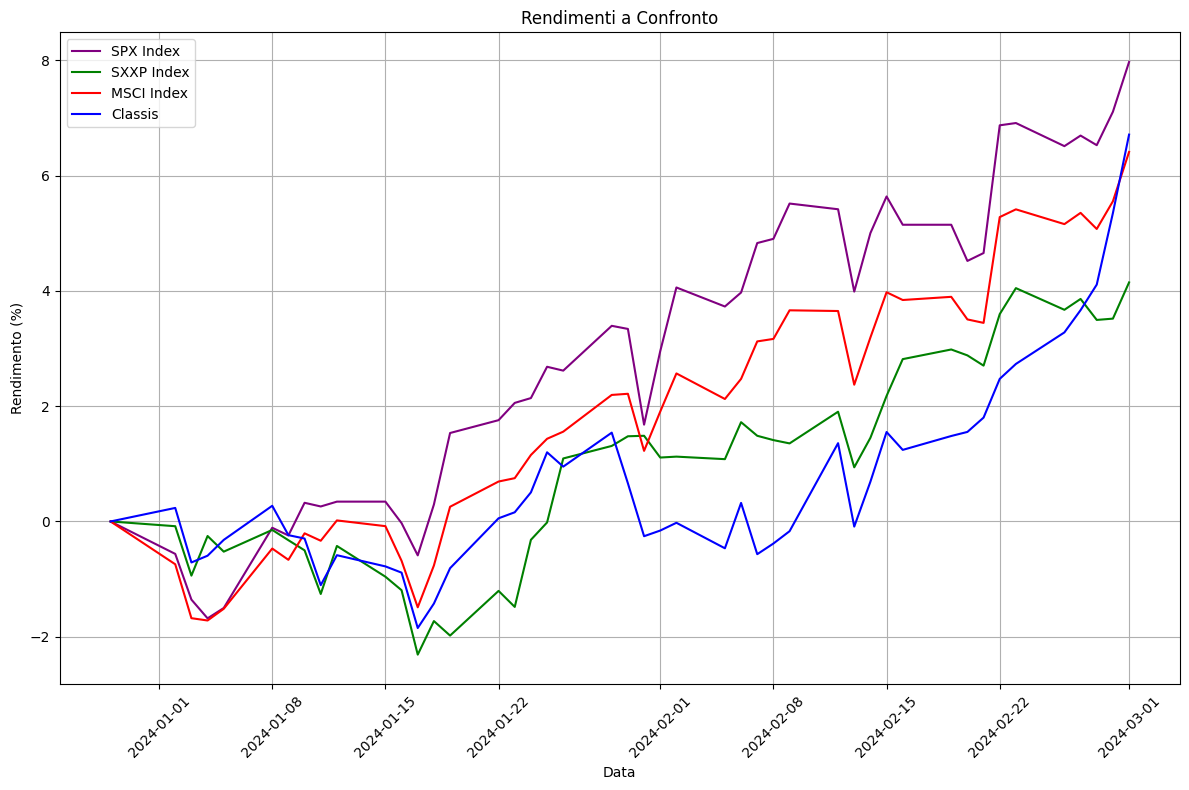

In [20]:
# Creazione del grafico
plt.figure(figsize=(12, 8))

# Tracciamento dei rendimenti cumulati per ciascuna colonna con colori diversi
for colonna, colore in zip(Index_cumulative_returns_percent.columns, ['purple', 'green', 'red', 'blue']):
    plt.plot(Index_cumulative_returns_percent.index, Index_cumulative_returns_percent[colonna], label=colonna, color=colore)

# Titoli e label degli assi
plt.title('Rendimenti a Confronto')
plt.xlabel('Data')
plt.ylabel('Rendimento (%)')

# Legenda
plt.legend()

# Griglia
plt.grid(True)

# Rotazione delle label sull'asse x per migliorare la leggibilità
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()
plt.show()


# Stampa


In [21]:
# Stampa delle statistiche del portafoglio
print("Statistiche del Portafoglio:")
print("Rendimento Medio del Portafoglio:", portfolio_mean_return)
print("Rapporto di Sharpe del Portafoglio:", sharpe_ratio)
print("Max Drawdown:", max_drawdown)

Statistiche del Portafoglio:
Rendimento Medio del Portafoglio: 0.14651575640695977
Rapporto di Sharpe del Portafoglio: 0.1647899021044165
Max Drawdown: 0.021149818047151214


# Chart Section


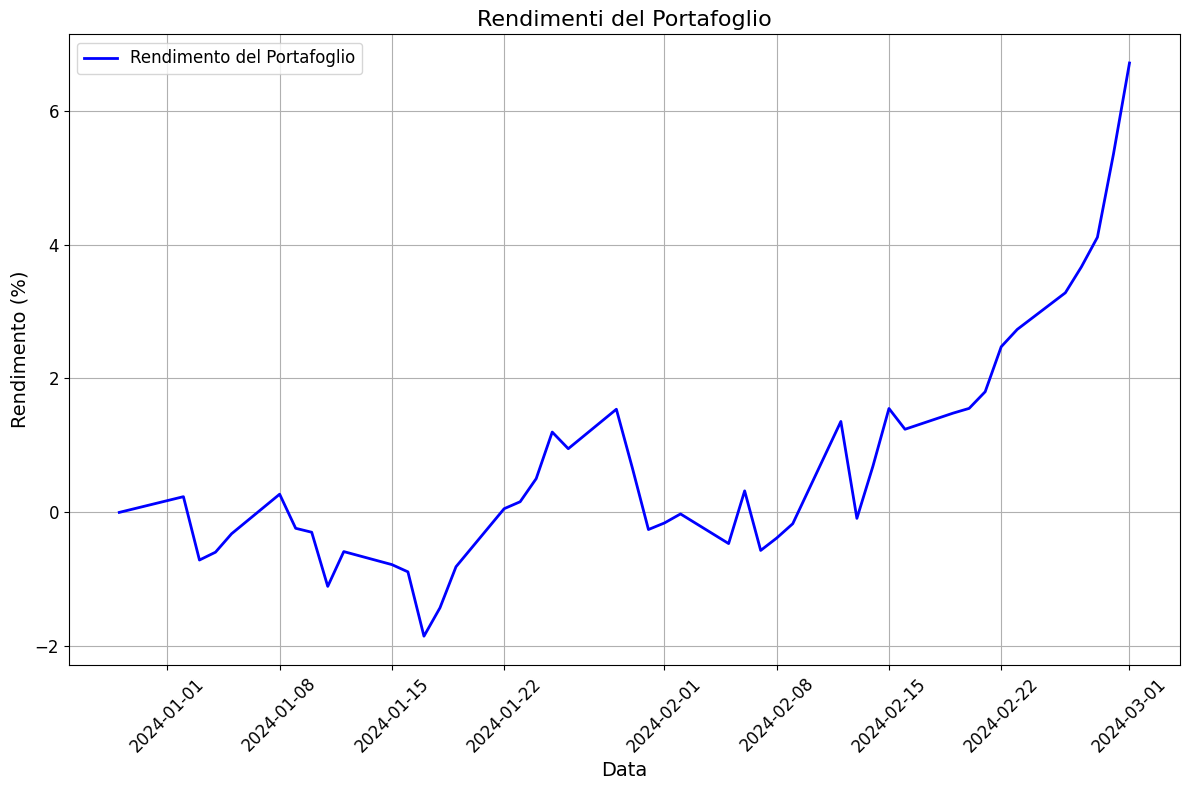

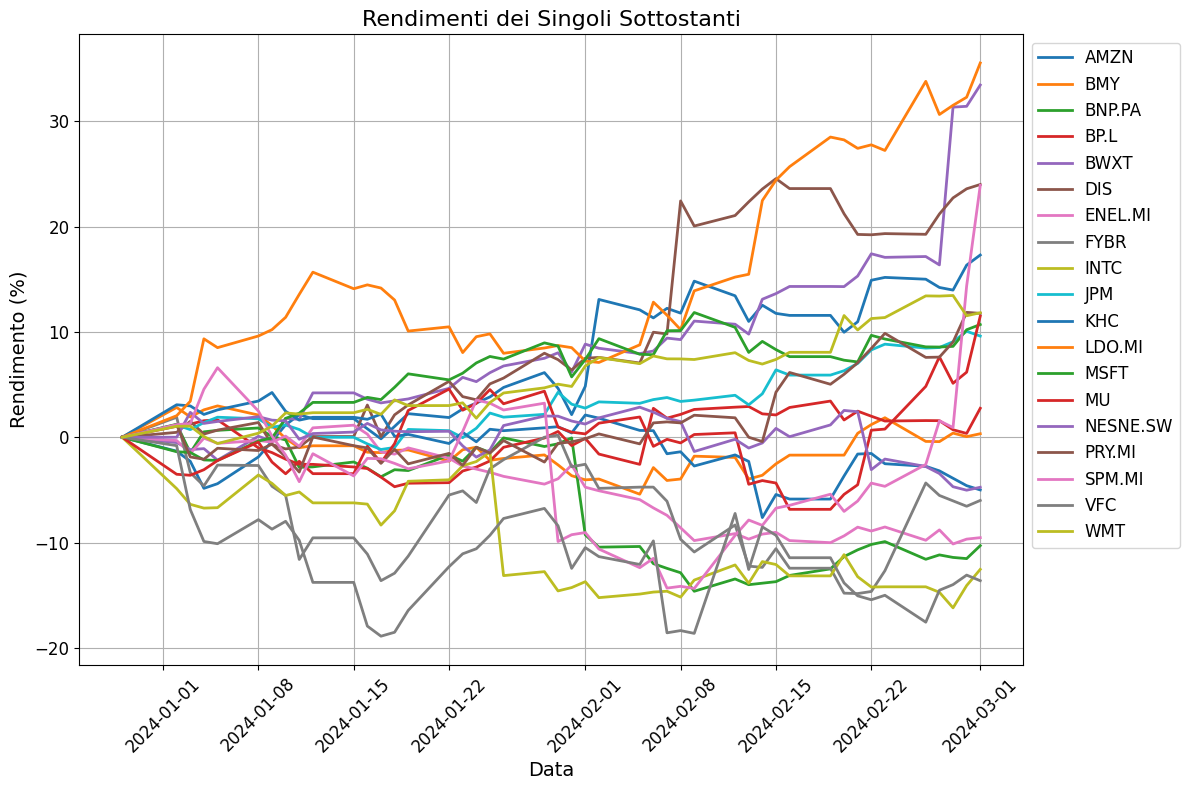

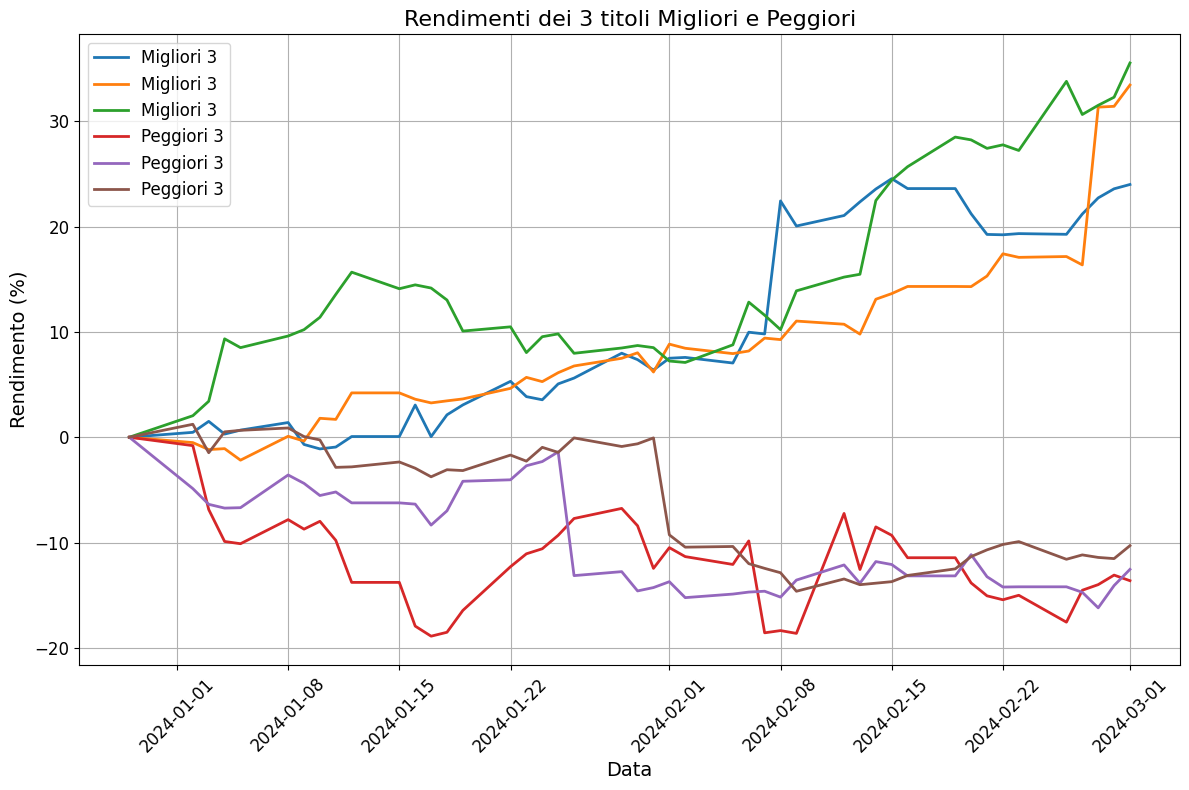

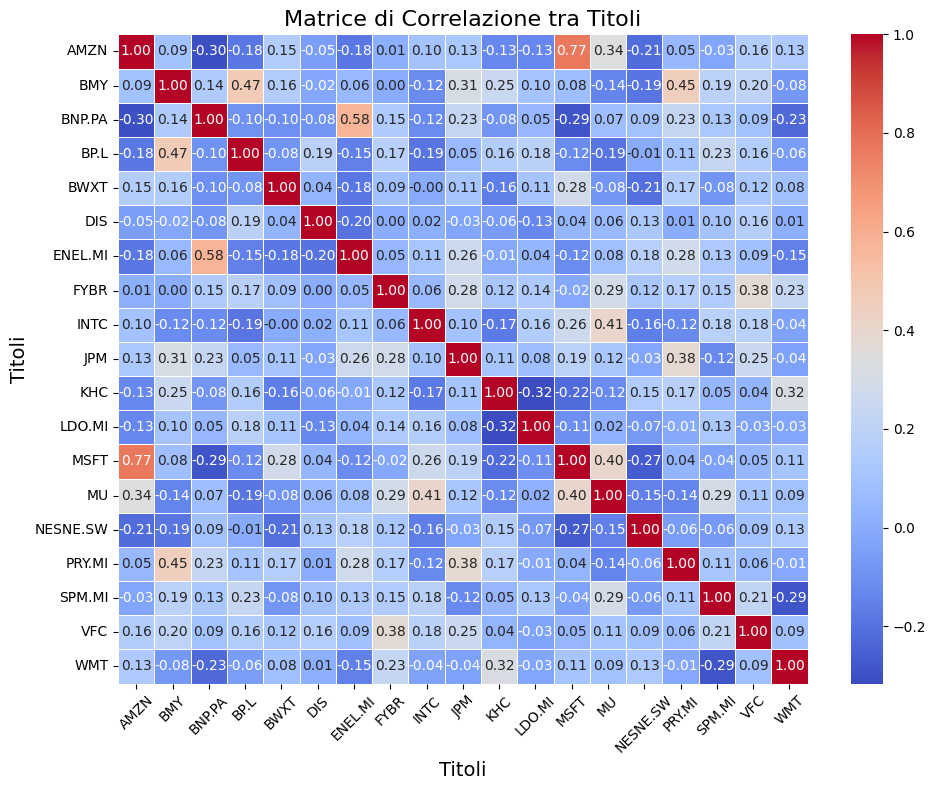

In [22]:
## Figura 1 ------------------------------------------------------------------------------------------------------------------------------------
# Traccia il grafico dei rendimenti cumulativi del portafoglio
plt.figure(figsize=(12, 8))
plt.plot(cumulative_portfolio_returns_percent.index, cumulative_portfolio_returns_percent, color='blue', linewidth=2, label='Rendimento del Portafoglio')
plt.title('Rendimenti del Portafoglio', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Rendimento (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Figura 2 ---------------------------------------------------------------------------------------------------------------------------------
# Traccia il grafico dei rendimenti cumulativi per ciascun sottostante
plt.figure(figsize=(12, 8))
for col in cumulative_returns_percent.columns:
    plt.plot(cumulative_returns_percent.index, cumulative_returns_percent[col], linewidth=2, label=col)

plt.title('Rendimenti dei Singoli Sottostanti', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Rendimento (%)', fontsize=14)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Figura 3 ---------------------------------------------------------------------------------------------------------------------------------
# Ordina i rendimenti cumulativi per l'ultima data e seleziona i primi e gli ultimi 3 titoli
sorted_cumulative_returns = cumulative_returns_percent.iloc[-1].sort_values()
top_3 = sorted_cumulative_returns.tail(3)
bottom_3 = sorted_cumulative_returns.head(3)

# Traccia il grafico dei rendimenti cumulativi dei migliori 3 e dei peggiori 3 titoli
plt.figure(figsize=(12, 8))
for col in top_3.index:
    plt.plot(cumulative_returns_percent.index, cumulative_returns_percent[col], linewidth=2, label='Migliori 3')
for col in bottom_3.index:
    plt.plot(cumulative_returns_percent.index, cumulative_returns_percent[col], linewidth=2, label='Peggiori 3')

plt.title('Rendimenti dei 3 titoli Migliori e Peggiori', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Rendimento (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## Figura 4 -------------------------------------------------------------------------------------------------------------------------------------
# Crea un heatmap della matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice di Correlazione tra Titoli', fontsize=16)
plt.xlabel('Titoli', fontsize=14)
plt.ylabel('Titoli', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


# Esporta Grafici

# Check Section


In [ ]:
print(portfolio_weights )